In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import classification_report
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier


C:\Users\gneur\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\gneur\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
wine_base = pd.read_csv("Our_dataset/StemmedWord2vecTop3_parsed_weather_labeled.csv", index_col=0) 
wine_base = wine_base.reset_index()
wine_base= wine_base[pd.notnull(wine_base['description'])]
wine_base.columns

Index(['vintage', 'country', 'description', 'points', 'price', 'province',
       'region_1', 'taster_name', 'variety', 'winery',
       'similarityTop3WinesByVariety', 'word_count', 'tf_grouped_1',
       'tf_grouped_2', 'tf_grouped_3', 'tfIdf_grouped_1', 'tfIdf_grouped_2',
       'tfIdf_grouped_3', 'tf_fullData_1', 'tf_fullData_2', 'tf_fullData_3',
       'tfIdf_fullData_1', 'tfIdf_fullData_2', 'tfIdf_fullData_3', 'pr_5',
       'pr_6', 'pr_7', 'pr_8', 'pr_9', 'tas_5', 'tas_6', 'tas_7', 'tas_8',
       'tas_9'],
      dtype='object')

In [ ]:
fig, ax = plt.subplots(figsize = (12, 5))
sns.distplot(wine_base["points"],hist=True,bins = 20,hist_kws={'edgecolor':'black'})

# DEFINE NUMBER OF BINS

In [ ]:
#right number of bins

c= 1 + (10/3)*math.log10(20)
c

In [3]:
Y = wine_base['points'].copy()
#DECIDE NUMBER OF BINS 

nbins  = 3
labels=["low","medium","high"]
#nbins  = 4
#labels=["low","medium","high","very_high"]
#nbins = 5
#labels=["very_low", "low", "medium","high","very_high"]
#bin identici 
#Y,bins = pd.cut(Y,nbins,labels=labels,retbins=True,include_lowest=True,right=True)
#quartile
Y,bins = pd.qcut(Y,nbins,labels=labels,retbins=True)  
values = Y.tolist()  
bins

array([ 80.,  87.,  90., 100.])

10.0


<module 'seaborn' from 'C:\\Users\\gneur\\Anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

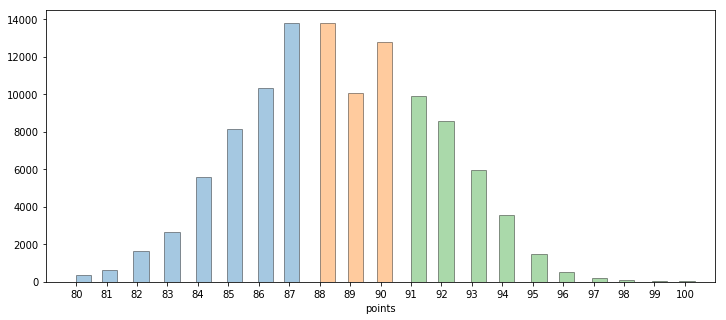

In [4]:
fig, ax = plt.subplots(figsize = (12, 5))
for i in range(1,len(bins)-1):

    if i == 1:
        a = wine_base[wine_base["points"] <= bins[i]]
        n =  bins[i]-80
        sns.distplot(a["points"],hist_kws={"width": 0.5,'edgecolor':'black'},kde=False)
        g =+n
    if i == len(bins)-1:
        a = wine_base[wine_base["points"] > bins[i]]
        n = 100 - bins[i]
        sns.distplot(a["points"],hist_kws={"width": 0.5,'edgecolor':'black'},kde=False)
        g =+ n
    else:
        n = bins[i+1] - bins[i]
        g =+n
        a = wine_base[(wine_base["points"] > bins[i]) & (wine_base["points"] <= bins[i+1])]
        sns.distplot(a["points"],hist_kws={"width": 0.5,'edgecolor':'black'},kde=False)
ax.set(xticks=wine_base["points"].unique())
print(g)
sns

In [5]:
basic = ["price",'vintage', 'country', 'province', 'region_1', 'taster_name', 'variety','winery']
word = ["word_count"]
tfGroup = ['tf_grouped_1','tf_grouped_2', 'tf_grouped_3']
tfIdfGroup = ['tfIdf_grouped_1', 'tfIdf_grouped_2', 'tfIdf_grouped_3']
tfFull = ['tf_fullData_1', 'tf_fullData_2', 'tf_fullData_3',]
tfIdfFull = ['tfIdf_fullData_1', 'tfIdf_fullData_2', 'tfIdf_fullData_3']
#weather = ['pr_5', 'pr_6', 'pr_7', 'pr_8', 'pr_9', 'tas_5', 'tas_6', 'tas_7', 'tas_8', 'tas_9']# don't really care bcs 0 improvements
word2vec = ['similarityTop3WinesByVariety']

In [6]:
features = basic + word + tfGroup + word2vec
X = wine_base.loc[:,features]
X.columns

Index(['price', 'vintage', 'country', 'province', 'region_1', 'taster_name',
       'variety', 'winery', 'word_count', 'tf_grouped_1', 'tf_grouped_2',
       'tf_grouped_3', 'similarityTop3WinesByVariety'],
      dtype='object')

# DUMMY CLASSIFIER = BASELINE

In [ ]:
X = wine_base.loc[:,features]
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
#classifier = DecisionTreeClassifier()
classifier = DummyClassifier("stratified")
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)  
acc = accuracy_score(y_test,y_pred)
weightedPrec = precision_score(y_test,y_pred,average="weighted")
#get feature importances
#lista
#for name, importance in zip(features, classifier.feature_importances_):
 #   lista.append([name, importance])
print(classification_report(y_test, y_pred, target_names=labels))

file = open("dummyClassifier.txt","a")
file.write("Decision Tree Classifier with points divided into " + str(bins) + " bins \n")
file.write("Built on: " + str(features) + "\n")
file.write("Test size: " + str(test_size) + "\n")
file.write("   " +"accuracy " + str(acc) + "\n")
file.write("   " +"weightedPrec " + str(weightedPrec) + "\n")
#file.write("Feature importances: \n")
#for el in lista: 
#file.write("   " + el[0] + ":   " + str(el[1]) + "\n")
file.write("Report By predicted class: \n")
file.write(classification_report(y_test, y_pred, target_names=labels))
file.close()

# REAL CLASSIFIER

In [ ]:
algorithm = "decTree" #"randomForest" o "decTree"


In [ ]:
if algorithm == "decTree":
    parameters={'max_depth': np.arange(2,10)}#'min_samples_split' : np.arange(10,500,20)}
    clf_tree=DecisionTreeClassifier()
else: 
    parameters={'max_depth': np.arange(2,7),"n_estimators":[2,3,4,5,6,7,8,9,10]}#'min_samples_split' : np.arange(10,500,20)}
    clf_tree = RandomForestClassifier()

clf= GridSearchCV(clf_tree,parameters)
clf.fit(X,Y)
print("Best parameters for " + algorithm + "points variable binnned by: " + str(bins))
clf.best_params_

In [ ]:
depth = 4
estimators = 7

In [ ]:
test_size = 0.30 #non va in overfitting, si vede dal grafico sotto
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
if algorithm == "decTree":
    classifier = DecisionTreeClassifier(max_depth=depth)
    print("Results obtained by " + algorithm + " with depth " + str(depth))
else:
    classifier = RandomForestClassifier(max_depth=depth,n_estimators = estimators)
    print("Results obtained by " + algorithm + " with depth " + str(depth) + "n_estimators = " +str(estimators))
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)  
acc = accuracy_score(y_test,y_pred)
weightedPrec = precision_score(y_test,y_pred,average="weighted")
#get feature importances
lista = []
for name, importance in zip(features, classifier.feature_importances_):
    lista.append([name, importance])

print(classification_report(y_test, y_pred, target_names=labels))

In [ ]:
lista

In [ ]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(classifier, prefit=True)
X_new = model.transform(X)
feature_idx = model.get_support()
temp = []
for i in range(0,len(feature_idx)): 
    if feature_idx[i]:
        temp.append(i)
print(temp)
selFeatures = []
for i in range(0,len(temp)):
    selFeatures.append(features[temp[i]])
selFeatures

Train on selected features

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=test_size, random_state=42)
if algorithm == "decTree":
    classifier=DecisionTreeClassifier(max_depth=depth)
    print("Results obtained by " + algorithm + " with depth " + str(depth))
else: 
    classifier = RandomForestClassifier(max_depth=depth,n_estimators = estimators)
    print("Results obtained by " + algorithm + " with depth " + str(depth) + "and N_estimators = " + str(estimators))
classifier.fit(X_train,y_train)
y_pred =classifier.predict(X_test)  
acc = accuracy_score(y_test,y_pred)
weightedPrec = precision_score(y_test,y_pred,average="weighted")
print(classification_report(y_test, y_pred, target_names=labels))

In [ ]:
import os
import sys
def conda_fix(graph):
        path = os.path.join(sys.base_exec_prefix, "Library", "bin", "graphviz")
        paths = ("dot", "twopi", "neato", "circo", "fdp")
        paths = {p: os.path.join(path, "{}.exe".format(p)) for p in paths}
        graph.set_graphviz_executables(paths)
import pydotplus 
from sklearn import tree
from IPython.display import Image  
dot_data = tree.export_graphviz(classifier, out_file=None, 
                         feature_names=selFeatures,  
                         class_names=labels,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
conda_fix(graph)
Image(graph.create_png())

check AUC, feature selection, and data with sparse matrix

In [ ]:
#do the same only add everything into a data frame so that you already have there everything you can plot

file = open("classification" + str(bins) + "bins.txt","a")
file.write("Decision Tree Classifier with points divided into " + str(bins) + " bins \n")
file.write("Built on: " + str(features) + "\n")
file.write("Test size: " + str(test_size) + "\n")
file.write("   " +"accuracy " + str(acc) + "\n")
file.write("   " +"weightedPrec " + str(weightedPrec) + "\n")
file.write("Feature importances: \n")
for el in lista: 
    file.write("   " + el[0] + ":   " + str(el[1]) + "\n")
file.write("Report By predicted class: \n")
file.write(classification_report(y_test, y_pred, target_names=labels))
file.close()

In [ ]:
#check learning curves
train_sizes, train_scores, test_scores = learning_curve(DecisionTreeClassifier(max_depth=3), 
                                                        X, 
                                                        Y,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.subplots(figsize = (12, 5))

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="red",alpha = 0.5)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="blue",alpha = 0.5)

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [76]:
args = [["price"],["price","word_count"],basic,basic+tfGroup, basic+word2vec,basic+word2vec+tfGroup,word2vec,tfGroup,word2vec+tfGroup]
allfeatures = basic + word + word2vec + tfGroup 
decTreeCombinations = {"depth":[2,3,4,5],"args":args}

In [83]:
#modificala per usare anche il random forest a modo
def testToDataFrame(algorithm,combination,Y,allfeats,dataset):
    test_size = 0.30 #non va in overfitting, si vede dal grafico sotto
    cols = ["algorithm","input","precision","accuracy","depth"]
    for el in features:
        cols.append("feat_"+el)
    
    results = pd.DataFrame()
    row = 0
    comb = 0
    for el in combination["args"]: 
        for depth in combination["depth"]:
            row = row + 1
            X = dataset.loc[:,el]
            X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
            if algorithm == "decTree":
                classifier = DecisionTreeClassifier(max_depth=depth)
            else:
                classifier = RandomForestClassifier(max_depth=depth,n_estimators = estimators)
            classifier.fit(X_train,y_train)
            y_pred = classifier.predict(X_test)  
            acc = accuracy_score(y_test,y_pred)
            weightedPrec = precision_score(y_test,y_pred,average="weighted")
            data = [algorithm,el,weightedPrec,acc,depth]
            temp = {}
            c = zip(el,classifier.feature_importances_)
            for name,importance in c:
                temp[name] = importance
            for feat in allfeats:
                if feat not in el:
                    data.append(0)
                else:
                    data.append(temp[feat])
            df2 = pd.DataFrame([data],columns=cols)
            results = results.append(df2,ignore_index=True)
        comb = comb + 1
    return results


In [77]:
res = testToDataFrame("decTree",decTreeCombinations,Y,allfeatures,wine_base)

C:\Users\gneur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\gneur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\gneur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [82]:
res.sort_values(["precision",'depth'],ascending=False)

,algorithm,input,precision,accuracy,depth,feat_price,feat_vintage,feat_country,feat_province,feat_region_1,feat_taster_name,feat_variety,feat_winery,feat_word_count,feat_tf_grouped_1,feat_tf_grouped_2,feat_tf_grouped_3,feat_similarityTop3WinesByVariety
19,decTree,"[price, vintage, country, province, region_1, ...",0.594490,0.586792,5,0.817221,0.005686,0.002884,0.000000,0.001383,0.080200,0.0,0.0,0.000000,0.092627,0.000000,0.000000,0.000000
17,decTree,"[price, vintage, country, province, region_1, ...",0.591351,0.560194,3,0.925955,0.000000,0.000000,0.000000,0.000000,0.044993,0.0,0.0,0.000000,0.029052,0.000000,0.000000,0.000000
21,decTree,"[price, vintage, country, province, region_1, ...",0.591351,0.560194,3,0.925955,0.000000,0.000000,0.000000,0.000000,0.044993,0.0,0.0,0.000000,0.029052,0.000000,0.000000,0.000000
6,decTree,"[price, word_count]",0.590381,0.584156,4,0.799292,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.200708,0.000000,0.000000,0.000000,0.000000
9,decTree,"[price, vintage, country, province, region_1, ...",0.589666,0.561133,3,0.933613,0.000000,0.000000,0.000000,0.000000,0.066387,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
13,decTree,"[price, vintage, country, province, region_1, ...",0.589666,0.561133,3,0.933613,0.000000,0.000000,0.000000,0.000000,0.066387,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
23,decTree,"[price, vintage, country, province, region_1, ...",0.585664,0.585338,5,0.816830,0.005683,0.002882,0.000000,0.001383,0.077197,0.0,0.0,0.000000,0.091383,0.000000,0.003302,0.001340
18,decTree,"[price, vintage, country, province, region_1, ...",0.584160,0.577249,4,0.848151,0.000000,0.000000,0.000000,0.000000,0.069646,0.0,0.0,0.000000,0.082203,0.000000,0.000000,0.000000
22,decTree,"[price, vintage, country, province, region_1, ...",0.584160,0.577249,4,0.848151,0.000000,0.000000,0.000000,0.000000,0.069646,0.0,0.0,0.000000,0.082203,0.000000,0.000000,0.000000
5,decTree,"[price, word_count]",0.579146,0.576280,3,0.852276,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.147724,0.000000,0.000000,0.000000,0.000000
